# First Name: Soe Htet
# Last Name: Naung

# Import Libraries  

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import matplotlib.pyplot as plt

# Import Data

In [110]:
Dengue = pd.read_csv('Dengue.csv', low_memory=False) #increase efficiency
pd.set_option('display.float_format', lambda x:'%f'%x)

# Data management 

In [111]:
Dengue['total_cases'] = pd.to_numeric(Dengue['total_cases'], errors='coerce') #convert variable to numeric
sub1=Dengue[['total_cases', 'city']].dropna() #dropping null values
sub1['city'] = sub1['city'].astype('category') #set the data type as categorical data
sub1['city']=sub1['city'].cat.rename_categories(["Iquitos", "SanJuan"])

# Box Plot

<IPython.core.display.Javascript object>


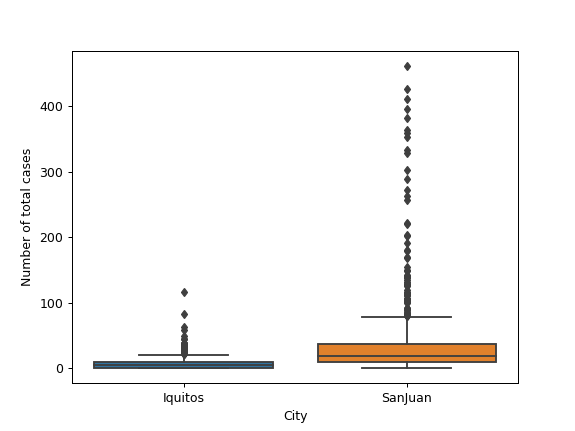

Text(0, 0.5, 'Number of total cases')

In [112]:
%matplotlib notebook
sns.boxplot(x='city', y='total_cases', data=sub1)
plt.xlabel('City')
plt.ylabel('Number of total cases')

# ANOVA

In [113]:
model1 = smf.ols(formula='total_cases ~ C(city)', data=sub1).fit()
print (model1.summary())

                            OLS Regression Results                            
Dep. Variable:            total_cases   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     115.0
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           8.08e-26
Time:                        17:11:25   Log-Likelihood:                -7127.2
No. Observations:                1377   AIC:                         1.426e+04
Df Residuals:                    1375   BIC:                         1.427e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.6629      2

In [114]:
print ('means for total cases per week by city')
m1 = sub1.groupby('city').mean()
print (m1)

means for total cases per week by city
         total_cases
city                
Iquitos     7.662896
SanJuan    34.185027


In [115]:
print ('standard deviations for total cases per week by city')
m1 = sub1.groupby('city').std()
print (m1)

standard deviations for total cases per week by city
         total_cases
city                
Iquitos    11.295332
SanJuan    51.408689
